In [24]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import log, dot, e
from numpy.random import rand
from sklearn import datasets

iris = np.genfromtxt('iris_full.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, :4]
y = iris[:, 4]
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

# shuffle
inds = np.arange(X.shape[0])
np.random.shuffle(inds)

X = X[inds]
y = y[inds]

print(X.shape)
print(y.shape)

C:\Users\Desmond\AppData\Local\Temp/ipykernel_2616/2263167913.py:11: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  X = iris.data[iris.data[:,2]!='2']


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 3 dimension(s)

In [22]:
X[:5], datasets.load_iris().data[:5]

(array([[1. , 5.1, 3.5, 1.4, 0.2],
        [1. , 4.9, 3. , 1.4, 0.2],
        [1. , 4.7, 3.2, 1.3, 0.2],
        [1. , 4.6, 3.1, 1.5, 0.2],
        [1. , 5. , 3.6, 1.4, 0.2]]),
 array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]))

In [5]:
class MyLogisticRegression:
    
    def sigmoid(self, z): return 1 / (1 + e**(-z))
    
    def cost_function(self, X, y, weights):                 
        z = dot(X, weights)
        predict_1 = y * log(self.sigmoid(z))
        predict_0 = (1 - y) * log(1 - self.sigmoid(z))
        return -sum(predict_1 + predict_0) / len(X)
    
    def predict(self, X):        
        # Predicting with sigmoid function
        z = dot(X, self.weights)
        # Returning binary result
        return [1 if i > 0.5 else 0 for i in self.sigmoid(z)]
    
    def fit(self, X, y, epochs=25, lr=0.05):        
        loss = []
        accs = []
        weights = rand(X.shape[1])
        N = len(X)
                 
        for _ in range(epochs):        
            # Gradient Descent
            y_hat = self.sigmoid(dot(X, weights))
            weights -= lr * dot(X.T,  y_hat - y) / N            
            # Saving Progress
            loss.append(self.cost_function(X, y, weights))
            y_pred = self.sigmoid(dot(X, weights)).round()
            acc = (y_pred == y).mean()
            accs.append(acc)
            
        self.weights = weights
        self.loss = loss
        self.accs = accs

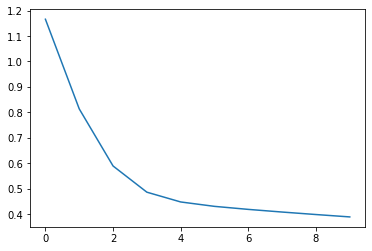

In [17]:
model = MyLogisticRegression()

lr = 0.05
epochs = 10
model.fit(X,y,epochs=epochs)
plt.plot(model.loss)

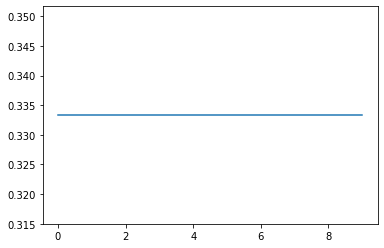

In [12]:
plt.plot(model.accs)

In [161]:
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def loss_function(h, y):
    return (-y*np.log(h) - (1-y)*np.log(1-h)).mean()

def predict(X, theta):    
    y_hat = sigmoid_function(np.dot(X, theta))
    return y_hat

def compute_gradient(X, y_hat, y):
    return np.dot(X.T, (y_hat - y)) / y.size

In [162]:
# training
lr=0.01
num_iter=100

theta = np.array([0.1, 0.5, 0.1, 0.5, -0.1])
losses = []
accs   = []

for i in range(num_iter):
    # predict z
    y_hat = predict(X, theta)
    
    # compute loss
    loss = loss_function(y_hat, y)

    # compute mean of gradient
    gradient = compute_gradient(X, y_hat, y)
    
    # update
    theta -= lr*gradient  
   
    
    
    
    # ==========for debug
    # loss
    losses.append(loss)

    # accuracy for training
    preds = predict(X, theta).round()
    acc = (preds == y).mean()
    accs.append(acc) 

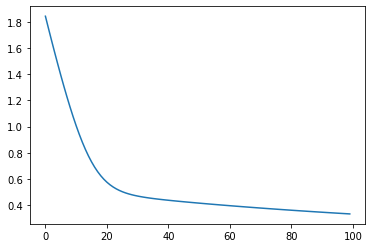

In [303]:
# show figures
plt.plot(losses)
plt.show()

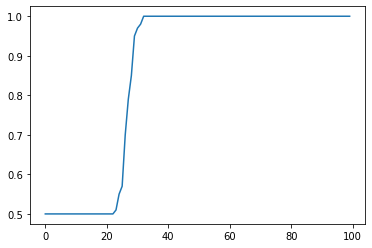

In [164]:
plt.plot(accs)
plt.show()

In [ ]:
preds = predict(X, theta).round()
print(preds)
print(y)